# Project: Yelp Rating Regression Predictor: Sarwaan Ansari

This Project is to Demonstrate how to use multiple linear regressions in order to predict how many stars a restaurant will have. 
In this project we'll be working with a real dataset provided by Yelp. We have provided six files, listed below with a brief description:
* `yelp_business.json`: establishment data regarding location and attributes for all businesses in the dataset
* `yelp_review.json`: Yelp review metadata by business
* `yelp_user.json`: user profile metadata by business
* `yelp_checkin.json`: online checkin metadata by business
* `yelp_tip.json`: tip metadata by business
* `yelp_photo.json`: photo metadata by business

For a more detailed explanation of the features in each `.json` file, see the accompanying [explanatory feature document](https://docs.google.com/document/d/1V6FjJpKspVBOOBs4E7fBfp_yzHn0--XJkC2uUtWuRgM/edit).


## Load the Data

In [1]:
import pandas as pd

businesses = pd.read_json('yelp_business.json', lines = True)
reviews = pd.read_json('yelp_review.json', lines = True)
users = pd.read_json('yelp_user.json', lines = True)
checkins = pd.read_json('yelp_checkin.json', lines = True)
tips = pd.read_json('yelp_tip.json', lines = True)
photos = pd.read_json('yelp_photo.json', lines = True)


In order to more clearly see the information in our DataFrame, we can adjust the number of columns shown (`max_columns`) and the number of characters shown in a column (`max_colwidth`) with the below code:

```python
pd.options.display.max_columns = number_of_columns_to_display
pd.options.display.max_colwidth = number_of_characters_to_display
```

In [2]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

Inspect the first five rows of each DataFrame

In [3]:
print(businesses.head())

               address  alcohol?  \
0    1314 44 Avenue NE         0   
1                              0   
2  1335 rue Beaubien E         1   
3      211 W Monroe St         0   
4  2005 Alyth Place SE         0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            attributes  \
0                                              {'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'averag

In [4]:
print(reviews.head())

   average_review_age  average_review_length  average_review_sentiment  \
0          524.458333             466.208333                  0.808638   
1         1199.589744             785.205128                  0.669126   
2          717.851852             536.592593                  0.820837   
3          751.750000             478.250000                  0.170925   
4          978.727273             436.181818                  0.562264   

              business_id  number_cool_votes  number_funny_votes  \
0  --1UhMGODdWsrMastO9DZw                 16                   1   
1  --6MefnULPED_I942VcFNA                 32                  27   
2  --7zmmkVg-IMGaXbuVd0SQ                 52                  29   
3  --8LPVSo5i0Oo61X01sV9A                  0                   0   
4  --9QQLMTbFzLJ_oT-ON3Xw                  4                   3   

   number_useful_votes  
0                   15  
1                   53  
2                   81  
3                    9  
4                    

In [5]:
print(users.head())

   average_days_on_yelp  average_number_fans  average_number_friends  \
0           1789.750000             1.833333               18.791667   
1           2039.948718            49.256410              214.564103   
2           1992.796296            19.222222              126.185185   
3           2095.750000             0.500000               25.250000   
4           1804.636364             1.000000               52.454545   

   average_number_years_elite  average_review_count             business_id  
0                    0.833333             57.541667  --1UhMGODdWsrMastO9DZw  
1                    1.769231            332.743590  --6MefnULPED_I942VcFNA  
2                    1.814815            208.962963  --7zmmkVg-IMGaXbuVd0SQ  
3                    0.000000              7.500000  --8LPVSo5i0Oo61X01sV9A  
4                    0.090909             34.636364  --9QQLMTbFzLJ_oT-ON3Xw  


In [6]:
print(checkins.head())

              business_id  \
0  7KPBkxAOEtb3QeIL9PEErg   
1  kREVIrSBbtqBhIYkTccQUg   
2  tJRDll5yqpZwehenzE2cSg   
3  tZccfdl6JNw-j5BKnCTIQQ   
4  r1p7RAMzCV_6NPF0dNoR3g   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  time  \
0  {'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2

In [7]:
print(tips.head())

   average_tip_length             business_id  number_tips
0           79.000000  --1UhMGODdWsrMastO9DZw            1
1           49.857143  --6MefnULPED_I942VcFNA           14
2           52.500000  --7zmmkVg-IMGaXbuVd0SQ           10
3          136.500000  --9QQLMTbFzLJ_oT-ON3Xw            2
4           68.064935  --9e1ONYQuAa-CB_Rrw7Tw          154


In [8]:
print(photos.head())

   average_caption_length             business_id  number_pics
0                0.000000  --1UhMGODdWsrMastO9DZw            1
1               67.500000  --6MefnULPED_I942VcFNA            2
2               30.426471  --9e1ONYQuAa-CB_Rrw7Tw          136
3                0.000000  --DaPTJW3-tB1vP-PfdTEg            1
4                5.500000  --FBCX-N37CMYDfs790Bnw            4


Shapes and feature number of review:

In [9]:
businesscount = len(businesses.groupby('business_id'))
print("Number of businesses: ")
print(businesscount)

review_features = len(reviews.columns)
print("Number of features in review: ")
print(review_features)

#Alternate method
print("Shapes")
print(businesses.shape)
print(reviews.shape)

Number of businesses: 
188593
Number of features in review: 
7
Shapes
(188593, 22)
(188593, 7)


Range of values of Features in the user dataframe.

In [10]:
for columns in users:
    print(str(columns) + ": " + str(min(list(users[columns]))) + " - " + str(max(list(users[columns])))) 

average_days_on_yelp: 76.0 - 4860.0
average_number_fans: 0.0 - 1174.6666666667
average_number_friends: 1.0 - 4219.0
average_number_years_elite: 0.0 - 10.6666666667
average_review_count: 0.6666666667000001 - 6335.0
business_id: --1UhMGODdWsrMastO9DZw - zzzaIBwimxVej4tY6qFOUQ


Example:
What is the Yelp rating, or `stars`, of the establishment with `business_id` = `5EvUIR4IzCWUOm0PsUZXjA`.

In [11]:
print(businesses[businesses['business_id'] == '5EvUIR4IzCWUOm0PsUZXjA']['stars'])

30781    3.0
Name: stars, dtype: float64


## Merge the Data

First model used left merge to preserve all business_id data: This was later changed as this caused a little bit of inaccurate results

In [12]:
df = pd.merge(businesses, reviews, how='left', on='business_id')
print(len(df))

188593


In [13]:
df = pd.merge(df, users, how = 'left', on= 'business_id')
df = pd.merge(df, checkins, how = 'left', on= 'business_id')
df = pd.merge(df, tips, how = 'left', on= 'business_id')
df = pd.merge(df, photos, how = 'left', on= 'business_id')

## Clean the Data

Dropping all data that is not continuous or quantitatively dependant to the stars of each resaurant.

In [14]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
df.drop(features_to_remove, axis = 1, inplace = True)

Checking to see if there are any nulls.

In [15]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_cool_votes             False
number_funny_votes            False
number_useful_votes           False
average_days_on_yelp          False
average_number_fans           False
average_number_friends        False
average_number_years_elite    False
average_review_count          False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

As you can see, there are a few columns with missing values. Since our dataset has no information recorded for some businesses in these columns, we will assume the Yelp pages did not display these features. 

In [16]:
df.fillna(0, inplace = True)
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_cool_votes             False
number_funny_votes            False
number_useful_votes           False
average_days_on_yelp          False
average_number_fans           False
average_number_friends        False
average_number_years_elite    False
average_review_count          False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

## Exploratory Analysis

Printing the corrolations of each type in relation to stars

In [17]:
print(df.corr().stars)

alcohol?                     -0.043332
good_for_kids                -0.030382
has_bike_parking              0.068084
has_wifi                     -0.039857
price_range                  -0.052565
review_count                  0.032413
stars                         1.000000
take_reservations            -0.024486
takes_credit_cards            0.037748
average_review_age           -0.125645
average_review_length        -0.277081
average_review_sentiment      0.782187
number_cool_votes             0.043375
number_funny_votes            0.001320
number_useful_votes          -0.000066
average_days_on_yelp         -0.038061
average_number_fans          -0.031141
average_number_friends       -0.007629
average_number_years_elite   -0.064419
average_review_count         -0.066572
weekday_checkins              0.004130
weekend_checkins              0.007863
average_tip_length           -0.052899
number_tips                   0.014038
average_caption_length        0.000040
number_pics              

In [18]:
from matplotlib import pyplot as plt

# plot average_review_sentiment against stars here
plt.scatter(df[['stars']], df[['average_review_sentiment']], alpha = .003)
plt.show()


<Figure size 640x480 with 1 Axes>

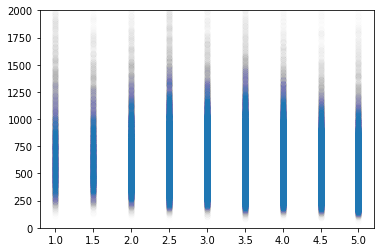

In [19]:
# plot average_review_length against stars here
plt.close('all')
plt.scatter(df[['stars']], df[['average_review_length']], alpha = .002)
plt.ylim(0, 2000)
plt.show()

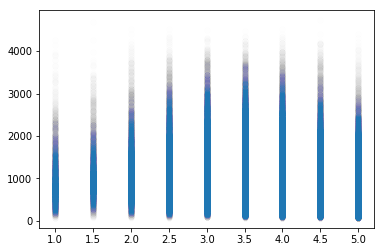

In [20]:
# plot average_review_age against stars here
plt.close('all')
plt.scatter(df[['stars']], df[['average_review_age']], alpha = .002)
plt.show()

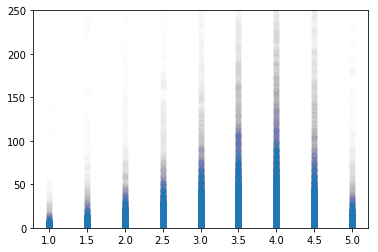

In [21]:
# plot number_funny_votes against stars here
plt.close('all')
plt.scatter(df[['stars']], df[['number_funny_votes']], alpha = .002)
plt.ylim(0, 250)
plt.show()

## Data Selection

In [22]:
features = df[['average_review_length', 'average_review_age']]
ratings = df[['stars']]

## Split the Data into Training and Testing Sets

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, ratings, train_size = .8, test_size = .2, random_state = 1)



## Create and Train the Model

In [24]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Evaluate and Understand the Model

In [25]:
print("R^2: ")
print(linear_model.score(X_train, Y_train))

print("Error: ")
print(linear_model.score(X_test, Y_test))

R^2: 
0.08250309566544889
Error: 
0.08083081210060561


As you can see that these feature give us a poor result. I will later be experimenting with other features to get a better prediction on the star predictor.

In [26]:
sorted(list(zip(['average_review_length','average_review_age'],linear_model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_length', array([-0.00099772, -0.00011622]))]

Lastly we can calculate the predicted Yelp ratings for our testing data and compare them to their actual Yelp ratings.

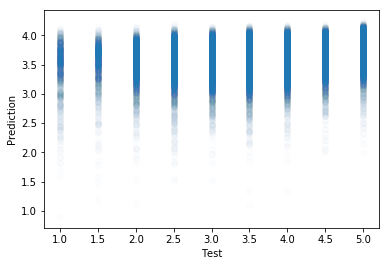

In [27]:
y_predicted = linear_model.predict(X_test)
plt.close('all')
plt.scatter(Y_test, y_predicted, alpha = .01)
plt.xlabel("Test")
plt.ylabel("Prediction")
plt.show()

## Define Different Subsets of Data

This section is to create other linear regression combinations to maximize the score of the model.

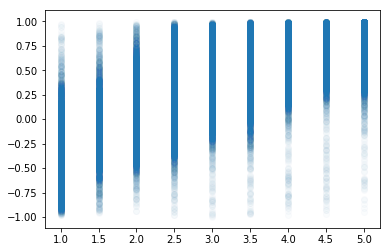

R^2: 
0.6130082233594101
Error: 
0.6069749619452953


In [28]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']
plt.close('all')
plt.scatter(df[['stars']], df[sentiment], alpha = .02)
plt.show()

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df[sentiment], df['stars'], random_state = 4, train_size = .8, test_size = .2)

linear_model2 = LinearRegression()
linear_model2.fit(X_train2, Y_train2)
print("R^2: ")
print(linear_model2.score(X_train2, Y_train2))

print("Error: ")
print(linear_model2.score(X_test2, Y_test2))

In [29]:
# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df[binary_features], df['stars'], random_state = 4, train_size = .8, test_size = .2)

linear_model3 = LinearRegression()
linear_model3.fit(X_train3, Y_train3)
print("R^2: ")
print(linear_model3.score(X_train3, Y_train3))

print("Error: ")
print(linear_model3.score(X_test3, Y_test3))

R^2: 
0.011538560437288736
Error: 
0.013007920119425864


In [30]:
# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

X_train4, X_test4, Y_train4, Y_test4 = train_test_split(df[numeric_features], df['stars'], random_state = 4, train_size = .8, test_size = .2)

linear_model4 = LinearRegression()
linear_model4.fit(X_train4, Y_train4)
print("R^2: ")
print(linear_model4.score(X_train4, Y_train4))

print("Error: ")
print(linear_model4.score(X_test4, Y_test4))

R^2: 
0.6739706858365202
Error: 
0.6695066748501262


In [31]:
# all features
all_features = binary_features + numeric_features

X_train5, X_test5, Y_train5, Y_test5 = train_test_split(df[all_features], df['stars'], random_state = 4, train_size = .8, test_size = .2)

linear_model5 = LinearRegression()
linear_model5.fit(X_train5, Y_train5)
print("R^2: ")
print(linear_model5.score(X_train5, Y_train5))

print("Error: ")
print(linear_model5.score(X_test5, Y_test5))

R^2: 
0.6810100245210478
Error: 
0.677345556367648


In [32]:
# new approach (use inner loops instead)
df2 = pd.merge(businesses, reviews, how='inner', on='business_id')
df2 = pd.merge(df2, users, how = 'inner', on= 'business_id')
df2 = pd.merge(df2, checkins, how = 'inner', on= 'business_id')
df2 = pd.merge(df2, tips, how = 'inner', on= 'business_id')
df2 = pd.merge(df2, photos, how = 'inner', on= 'business_id')
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
df2.drop(features_to_remove, axis = 1, inplace = True)
print(df2.isna().any())

feature_subset = ['average_review_sentiment', 'average_review_length', 'number_cool_votes', 'average_review_age', 'review_count', 'number_tips', 'number_useful_votes', 'weekday_checkins', 'weekend_checkins', 'average_caption_length', 'takes_credit_cards', 'good_for_kids', 'price_range', 'take_reservations']

X_train6, X_test6, Y_train6, Y_test6 = train_test_split(df2[all_features], df2['stars'], random_state = 4, train_size = .8, test_size = .2)

linear_model6 = LinearRegression()
linear_model6.fit(X_train6, Y_train6)
print("R^2: ")
print(linear_model6.score(X_train6, Y_train6))

print("Error: ")
print(linear_model6.score(X_test6, Y_test6))

df_temp = df2.corr().stars.reset_index()
print(df_temp)

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_cool_votes             False
number_funny_votes            False
number_useful_votes           False
average_days_on_yelp          False
average_number_fans           False
average_number_friends        False
average_number_years_elite    False
average_review_count          False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool
R^2: 
0.7301025692896536
Error: 
0.7322734335074711


## Further Modeling

Now that we have lists of different feature subsets, we can create new models from them. The last subset was the most accurate with a R^2 value of .73.
This will be the primary predictor as the corrolation is higher under this model compared to the others.

The function below is a prototype function to compare different features.
I later update the function for the improved linear regression model found in the previous step.

In [33]:
import numpy as np

# take a list of features to model as a parameter
def model_these_features(feature_list):
    
    # 
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    
    # 
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    # don't worry too much about these lines, just know that they allow the model to work when
    # we model on just one feature instead of multiple features. Trust us on this one :)
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # 
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # 
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # 
    y_predicted = model.predict(X_test)
    
    # 
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Train Score: 0.6118980950438655
Test Score: 0.6114021046919492
[('average_review_sentiment', 2.3033908433749586)]


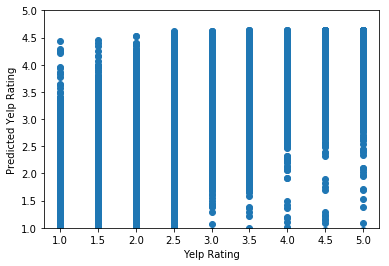

In [34]:
# create a model on sentiment here
model_these_features(sentiment)

Train Score: 0.012223180709591164
Test Score: 0.010119542202269072
[('has_bike_parking', 0.19003008208039676), ('alcohol?', -0.14549670708138332), ('has_wifi', -0.13187397577762547), ('good_for_kids', -0.08632485990337231), ('takes_credit_cards', 0.07175536492195614), ('take_reservations', 0.04526558530451594)]


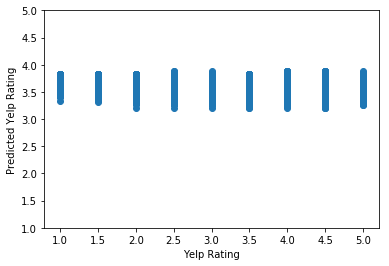

In [35]:
# create a model on all binary features here
model_these_features(binary_features)

Train Score: 0.673499259376666
Test Score: 0.6713318798120138
[('average_review_sentiment', 2.2721076642097686), ('price_range', -0.0804608096270259), ('average_number_years_elite', -0.07190366288054195), ('average_caption_length', -0.00334706600778316), ('number_pics', -0.0029565028128950613), ('number_tips', -0.0015953050789039144), ('number_cool_votes', 0.0011468839227082779), ('average_number_fans', 0.0010510602097444858), ('average_review_length', -0.0005813655692094847), ('average_tip_length', -0.0005322032063458541), ('number_useful_votes', -0.00023203784758702592), ('average_review_count', -0.00022431702895061526), ('average_review_age', -0.0001693060816507226), ('average_days_on_yelp', 0.00012878025876700503), ('weekday_checkins', 5.918580754475574e-05), ('weekend_checkins', -5.518176206986478e-05), ('average_number_friends', 4.826992111594799e-05), ('review_count', -3.48348376378989e-05), ('number_funny_votes', -7.884395674183897e-06)]


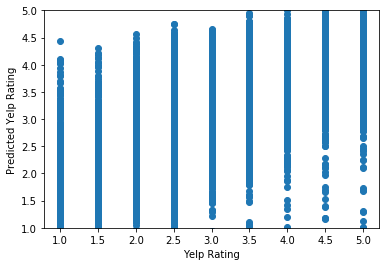

In [36]:
# create a model on all numeric features here
model_these_features(numeric_features)

Train Score: 0.6807828861895333
Test Score: 0.6782129045869245
[('average_review_sentiment', 2.280845699662378), ('alcohol?', -0.14991498593470778), ('has_wifi', -0.12155382629262777), ('good_for_kids', -0.11807814422012647), ('price_range', -0.06486730150041178), ('average_number_years_elite', -0.0627893971389538), ('has_bike_parking', 0.027296969912285574), ('takes_credit_cards', 0.02445183785362615), ('take_reservations', 0.014134559172970311), ('number_pics', -0.0013133612300815713), ('average_number_fans', 0.0010267986822657448), ('number_cool_votes', 0.000972372273441118), ('number_tips', -0.0008546563320877247), ('average_caption_length', -0.0006472749798191067), ('average_review_length', -0.0005896257920272376), ('average_tip_length', -0.00042052175034057535), ('number_useful_votes', -0.00027150641256160215), ('average_review_count', -0.00023398356902509327), ('average_review_age', -0.00015776544111326904), ('average_days_on_yelp', 0.00012326147662885747), ('review_count', 0.00

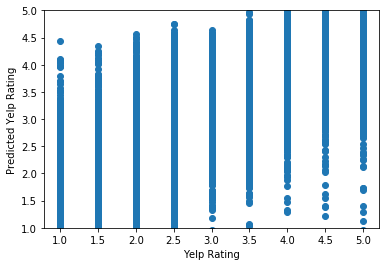

In [37]:
# create a model on all features here
model_these_features(all_features)

Train Score: 0.7327779918864505
Test Score: 0.7218067386865297
[('average_review_sentiment', 2.509615393984438), ('alcohol?', -0.08950697790078399), ('takes_credit_cards', -0.04726690222586274), ('has_wifi', -0.035216903899913596), ('good_for_kids', -0.03504271840359211), ('has_bike_parking', 0.030198023627126938), ('take_reservations', 0.014318113630989603), ('average_number_years_elite', -0.012217157756917627), ('price_range', 0.008920227371362121), ('average_number_fans', 0.002258097850241656), ('average_review_length', -0.0008432360808019792), ('number_cool_votes', 0.000614511597747489), ('average_caption_length', 0.0004428273677087432), ('average_review_count', -0.0003920608166051522), ('number_tips', 0.000338776251693516), ('average_tip_length', -0.0002478656910649083), ('average_review_age', -0.0001739245045782306), ('review_count', -0.00017005462041057683), ('average_days_on_yelp', 0.00015026777412400873), ('weekend_checkins', -0.0001156700526677812), ('weekday_checkins', 8.819

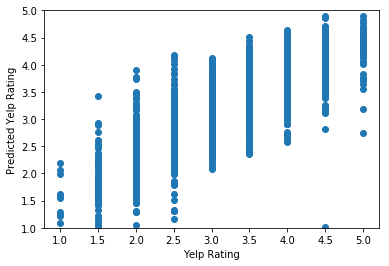

In [38]:
# create a model on your feature subset here
def model_these_features2(feature_list):
    
    # 
    ratings = df2.loc[:,'stars']
    features = df2.loc[:,feature_list]
    
    # 
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    # don't worry too much about these lines, just know that they allow the model to work when
    # we model on just one feature instead of multiple features. Trust us on this one :)
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # 
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # 
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # 
    y_predicted = model.predict(X_test)
    
    # 
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()
model_these_features2(all_features)

## Example for the Predictor


In [39]:
print(all_features)

['alcohol?', 'has_bike_parking', 'takes_credit_cards', 'good_for_kids', 'take_reservations', 'has_wifi', 'review_count', 'price_range', 'average_caption_length', 'number_pics', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_tip_length', 'number_tips', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins']


In [40]:
features = df2.loc[:,all_features]
ratings = df2.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])

,Feature,Mean,Min,Max
0,alcohol?,0.537129,0.000000,1.000000
1,has_bike_parking,0.659817,0.000000,1.000000
2,takes_credit_cards,0.878041,0.000000,1.000000
3,good_for_kids,0.758373,0.000000,1.000000
4,take_reservations,0.419685,0.000000,1.000000
5,has_wifi,0.455104,0.000000,1.000000
6,review_count,109.480896,3.000000,7968.000000
7,price_range,1.682755,0.000000,4.000000
8,average_caption_length,16.511708,0.000000,140.000000
9,number_pics,8.895967,1.000000,1150.000000


In [42]:
example = np.array([0,1,1,1,1,1,10,2,3,10,10,1200,0.9,3,6,5,50,3,50,1800,12,123,0.5,0,0]).reshape(1,-1)

In [43]:
model.predict(example)

array([3.93753296])

This example restaurant is predicted to have a 4 star rating on yelp.